# Car Price Prediction (PAkistan)


In [1]:
#Mounting drive data to Google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#installing or importing important matrix to perform operations on the data
#using SK learn lib for evaulation
#seaborn for plot
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#read the data set from the CSV file
df=pd.read_csv('/content/gdrive/My Drive/DMML/updated_pakwheels.csv')
df.head()

,Ad No,Name,Price,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features,Last Updated,URL
0,4096758,Toyota Vitz F 1.0 2017,2385000,2017,"G- 8, Islamabad Islamabad",9869,Un-Registered,1,1000,1,Silver,Imported,1,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",11-Jul-20,https://www.pakwheels.com/used-cars/toyota-vit...
1,4168305,Toyota Corolla GLi Automatic 1.3 VVTi 2019,111000,2019,Peshawar KPK,11111,Islamabad,1,1300,1,White,Local,2,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",12-Jul-20,https://www.pakwheels.com/used-cars/toyota-cor...
2,4168298,Suzuki Alto VXL 2019,1530000,2019,"Akora Khattak, Nowshera KPK",17500,Un-Registered,1,660,1,White,Local,1,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",12-Jul-20,https://www.pakwheels.com/used-cars/suzuki-alt...
3,4168307,Suzuki Alto VXR 2019,1650000,2019,"Abdullahpur, Faisalabad Punjab",9600,Lahore,1,660,2,White,Local,1,"AM/FM Radio, Air Bags, Air Conditioning, DVD ...",12-Jul-20,https://www.pakwheels.com/used-cars/suzuki-alt...
4,4168306,Toyota Corolla XLi VVTi 2010,1435000,2010,"9th Avenue, Islamabad Islamabad",120000,Islamabad,1,1300,2,Black,Local,2,"AM/FM Radio, Air Conditioning, CD Player, Key...",12-Jul-20,https://www.pakwheels.com/used-cars/toyota-cor...


In [4]:
#check if there are any null value in the data set
df.isnull().sum()
#features needs some processing

Ad No                 0
Name                  0
Price                 0
Model Year            0
Location              0
Mileage               0
Registered City       0
Engine Type           0
Engine Capacity       0
Transmission          0
Color                 0
Assembly              0
Body Type             0
Features           2521
Last Updated          0
URL                   0
dtype: int64

In [5]:
df.shape

(46023, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46023 entries, 0 to 46022
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ad No            46023 non-null  int64 
 1   Name             46023 non-null  object
 2   Price            46023 non-null  int64 
 3   Model Year       46023 non-null  int64 
 4   Location         46023 non-null  object
 5   Mileage          46023 non-null  int64 
 6   Registered City  46023 non-null  object
 7   Engine Type      46023 non-null  int64 
 8   Engine Capacity  46023 non-null  int64 
 9   Transmission     46023 non-null  int64 
 10  Color            46023 non-null  object
 11  Assembly         46023 non-null  object
 12  Body Type        46023 non-null  int64 
 13  Features         43502 non-null  object
 14  Last Updated     46023 non-null  object
 15  URL              46023 non-null  object
dtypes: int64(8), object(8)
memory usage: 5.6+ MB


In [7]:
df.describe()

,Ad No,Price,Model Year,Mileage,Engine Type,Engine Capacity,Transmission,Body Type
count,4.602300e+04,4.602300e+04,46023.00000,46023.000000,46023.000000,46023.000000,46023.000000,46023.000000
mean,4.070389e+06,2.014144e+06,2011.03533,90964.107772,1.084110,1313.115290,1.534776,1.772331
std,1.680335e+05,2.939040e+06,6.39934,63656.340890,0.373594,614.684157,0.498795,1.022013
min,1.338100e+04,1.110000e+05,1990.00000,1.000000,1.000000,16.000000,1.000000,1.000000
25%,4.051758e+06,8.500000e+05,2007.00000,48891.500000,1.000000,1000.000000,1.000000,1.000000
50%,4.103354e+06,1.450000e+06,2013.00000,80000.000000,1.000000,1300.000000,2.000000,2.000000
75%,4.142396e+06,2.300000e+06,2016.00000,120000.000000,1.000000,1500.000000,2.000000,2.000000
max,4.168339e+06,7.750000e+07,2019.00000,999999.000000,3.000000,6600.000000,2.000000,6.000000


# Detail desc
Ad No -	Unique ID
Name	-Name of the car includes the make, model, year and variant of a car


Price	-Listed price of the car


Model Year	-Model year of the car

Location	-Locality of the car owner

Mileage	-How much the car has travelled

Registered City	-Registration city of the car

Engine Type	-Engine type is broken down in 1 to 3 where: 1 -> Petrol 2 -> Diesel 3 -> Hybrid
Engine Capacity	-Engine capacity of the car

Transmission	-Transmission is broken down in 1 to 2 where: 1 -> Automatic 2 -> Manual

Color	-colour of the car

Assembly	-assemble done in?

Body Type	-Body type is broken down in 1 to 6 where: 1 for Hatchback 2 for Sedan 3 for Suv 4 for mini van 5 for Crossover 6 for Van

Features	-includes extra features in car

Last Updated	-no

URL	-no

# Feature Engineering


In [8]:
#name of the car or brand has unnecessary years split and clean it to brand name
df['manufacturer_name'] = df.Name.apply(lambda x : x.split()[0])
df

,Ad No,Name,Price,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features,Last Updated,URL,manufacturer_name
0,4096758,Toyota Vitz F 1.0 2017,2385000,2017,"G- 8, Islamabad Islamabad",9869,Un-Registered,1,1000,1,Silver,Imported,1,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",11-Jul-20,https://www.pakwheels.com/used-cars/toyota-vit...,Toyota
1,4168305,Toyota Corolla GLi Automatic 1.3 VVTi 2019,111000,2019,Peshawar KPK,11111,Islamabad,1,1300,1,White,Local,2,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",12-Jul-20,https://www.pakwheels.com/used-cars/toyota-cor...,Toyota
2,4168298,Suzuki Alto VXL 2019,1530000,2019,"Akora Khattak, Nowshera KPK",17500,Un-Registered,1,660,1,White,Local,1,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",12-Jul-20,https://www.pakwheels.com/used-cars/suzuki-alt...,Suzuki
3,4168307,Suzuki Alto VXR 2019,1650000,2019,"Abdullahpur, Faisalabad Punjab",9600,Lahore,1,660,2,White,Local,1,"AM/FM Radio, Air Bags, Air Conditioning, DVD ...",12-Jul-20,https://www.pakwheels.com/used-cars/suzuki-alt...,Suzuki
4,4168306,Toyota Corolla XLi VVTi 2010,1435000,2010,"9th Avenue, Islamabad Islamabad",120000,Islamabad,1,1300,2,Black,Local,2,"AM/FM Radio, Air Conditioning, CD Player, Key...",12-Jul-20,https://www.pakwheels.com/used-cars/toyota-cor...,Toyota
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46018,3448128,Honda Vezel Hybrid X 2015,3400000,2015,Lahore Punjab,32000,Un-Registered,1,1500,1,Black,Imported,5,NaN,28-Jul-19,https://www.pakwheels.com/used-cars/honda-veze...,Honda
46019,3737684,Toyota Aqua S 2015,2450000,2015,Rawalpindi Punjab,52000,Un-Registered,1,1500,1,Blue,Imported,1,NaN,18-Dec-19,https://www.pakwheels.com/used-cars/toyota-aqu...,Toyota
46020,3349017,Honda Civic VTi Prosmatec 1.8 i-VTEC 2015,3250000,2015,Lahore Punjab,125000,Lahore,1,1800,1,Black,Local,2,NaN,4-Jun-19,https://www.pakwheels.com/used-cars/honda-civi...,Honda
46021,3748215,Toyota Aqua G 2016,3000000,2016,Gujranwala Punjab,60000,Lahore,1,1500,1,Black,Imported,1,NaN,22-Dec-19,https://www.pakwheels.com/used-cars/toyota-aqu...,Toyota


In [9]:
#clean the location field
df['Location_trans'] = df.Location.apply(lambda x: x.split()[-1])

In [10]:
### as we can see in the reg city we can see the name and 
## un registred(this can be converted to cat 1 to 0(1->regestered, 0->unregestered)) 

def get(val):
    if val!='Un-Registered':
        return '1'
    else:
        return '0'
df['Registered'] = df['Registered City'].apply(get)

In [11]:
### as we can see in the reg city we can see the name and 
## un registred(this can be converted to cat 1 to 0(1->Imported, 0->local)) 
def get(val):
    if val!='Local':
        return '1'
    else:
        return '0'
df['Assembly'] = df['Assembly'].apply(get)

In [12]:
df.isnull().sum()

Ad No                   0
Name                    0
Price                   0
Model Year              0
Location                0
Mileage                 0
Registered City         0
Engine Type             0
Engine Capacity         0
Transmission            0
Color                   0
Assembly                0
Body Type               0
Features             2521
Last Updated            0
URL                     0
manufacturer_name       0
Location_trans          0
Registered              0
dtype: int64

In [13]:
df

,Ad No,Name,Price,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features,Last Updated,URL,manufacturer_name,Location_trans,Registered
0,4096758,Toyota Vitz F 1.0 2017,2385000,2017,"G- 8, Islamabad Islamabad",9869,Un-Registered,1,1000,1,Silver,1,1,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",11-Jul-20,https://www.pakwheels.com/used-cars/toyota-vit...,Toyota,Islamabad,0
1,4168305,Toyota Corolla GLi Automatic 1.3 VVTi 2019,111000,2019,Peshawar KPK,11111,Islamabad,1,1300,1,White,0,2,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",12-Jul-20,https://www.pakwheels.com/used-cars/toyota-cor...,Toyota,KPK,1
2,4168298,Suzuki Alto VXL 2019,1530000,2019,"Akora Khattak, Nowshera KPK",17500,Un-Registered,1,660,1,White,0,1,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",12-Jul-20,https://www.pakwheels.com/used-cars/suzuki-alt...,Suzuki,KPK,0
3,4168307,Suzuki Alto VXR 2019,1650000,2019,"Abdullahpur, Faisalabad Punjab",9600,Lahore,1,660,2,White,0,1,"AM/FM Radio, Air Bags, Air Conditioning, DVD ...",12-Jul-20,https://www.pakwheels.com/used-cars/suzuki-alt...,Suzuki,Punjab,1
4,4168306,Toyota Corolla XLi VVTi 2010,1435000,2010,"9th Avenue, Islamabad Islamabad",120000,Islamabad,1,1300,2,Black,0,2,"AM/FM Radio, Air Conditioning, CD Player, Key...",12-Jul-20,https://www.pakwheels.com/used-cars/toyota-cor...,Toyota,Islamabad,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46018,3448128,Honda Vezel Hybrid X 2015,3400000,2015,Lahore Punjab,32000,Un-Registered,1,1500,1,Black,1,5,NaN,28-Jul-19,https://www.pakwheels.com/used-cars/honda-veze...,Honda,Punjab,0
46019,3737684,Toyota Aqua S 2015,2450000,2015,Rawalpindi Punjab,52000,Un-Registered,1,1500,1,Blue,1,1,NaN,18-Dec-19,https://www.pakwheels.com/used-cars/toyota-aqu...,Toyota,Punjab,0
46020,3349017,Honda Civic VTi Prosmatec 1.8 i-VTEC 2015,3250000,2015,Lahore Punjab,125000,Lahore,1,1800,1,Black,0,2,NaN,4-Jun-19,https://www.pakwheels.com/used-cars/honda-civi...,Honda,Punjab,1
46021,3748215,Toyota Aqua G 2016,3000000,2016,Gujranwala Punjab,60000,Lahore,1,1500,1,Black,1,1,NaN,22-Dec-19,https://www.pakwheels.com/used-cars/toyota-aqu...,Toyota,Punjab,1


In [14]:
df_1 = df.copy()

In [15]:
#Drop the null value in the column and row get reduced
df_drop = df_1.dropna(subset = ['Features'])
df_drop

,Ad No,Name,Price,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features,Last Updated,URL,manufacturer_name,Location_trans,Registered
0,4096758,Toyota Vitz F 1.0 2017,2385000,2017,"G- 8, Islamabad Islamabad",9869,Un-Registered,1,1000,1,Silver,1,1,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",11-Jul-20,https://www.pakwheels.com/used-cars/toyota-vit...,Toyota,Islamabad,0
1,4168305,Toyota Corolla GLi Automatic 1.3 VVTi 2019,111000,2019,Peshawar KPK,11111,Islamabad,1,1300,1,White,0,2,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",12-Jul-20,https://www.pakwheels.com/used-cars/toyota-cor...,Toyota,KPK,1
2,4168298,Suzuki Alto VXL 2019,1530000,2019,"Akora Khattak, Nowshera KPK",17500,Un-Registered,1,660,1,White,0,1,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",12-Jul-20,https://www.pakwheels.com/used-cars/suzuki-alt...,Suzuki,KPK,0
3,4168307,Suzuki Alto VXR 2019,1650000,2019,"Abdullahpur, Faisalabad Punjab",9600,Lahore,1,660,2,White,0,1,"AM/FM Radio, Air Bags, Air Conditioning, DVD ...",12-Jul-20,https://www.pakwheels.com/used-cars/suzuki-alt...,Suzuki,Punjab,1
4,4168306,Toyota Corolla XLi VVTi 2010,1435000,2010,"9th Avenue, Islamabad Islamabad",120000,Islamabad,1,1300,2,Black,0,2,"AM/FM Radio, Air Conditioning, CD Player, Key...",12-Jul-20,https://www.pakwheels.com/used-cars/toyota-cor...,Toyota,Islamabad,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43497,3866824,Honda Civic VTi Oriel 1.8 i-VTEC 2006,1235000,2006,Multan Punjab,107000,Karachi,1,1800,2,Black,0,2,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",8-Feb-20,https://www.pakwheels.com/used-cars/honda-civi...,Honda,Punjab,1
43498,3867126,Nissan Juke 15RX Urban Selection 2011,2200000,2011,"D Ground, Faisalabad Punjab",83000,Karachi,1,1500,1,Grey,1,3,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",9-Feb-20,https://www.pakwheels.com/used-cars/nissan-juk...,Nissan,Punjab,1
43499,3867438,Honda Vezel Hybrid Z Honda Sensing 2014,3750000,2014,"Defence Phase-2, Islamabad Islamabad",22000,Islamabad,3,1500,1,White,1,5,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",9-Feb-20,https://www.pakwheels.com/used-cars/honda-veze...,Honda,Islamabad,1
43500,3866771,Toyota Corolla Axio G 2007,2100000,2007,Peshawar KPK,123455,Islamabad,1,1500,1,Silver,1,2,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",8-Feb-20,https://www.pakwheels.com/used-cars/toyota-cor...,Toyota,KPK,1


In [16]:
#check missing values
df_drop.isna().sum()

Ad No                0
Name                 0
Price                0
Model Year           0
Location             0
Mileage              0
Registered City      0
Engine Type          0
Engine Capacity      0
Transmission         0
Color                0
Assembly             0
Body Type            0
Features             0
Last Updated         0
URL                  0
manufacturer_name    0
Location_trans       0
Registered           0
dtype: int64

Work on the feature column to find out if those extrA features are healpful

In [17]:
#adding features to another DF to process
#str.strip Remove leading and trailing characters in Series/Index.
#When using expand=True, the split elements will expand out into separate columns. 
#If NaN is present, it is propagated throughout the columns during the split.
df1=pd.DataFrame(df_drop['Features'].str.strip("'").str.split(',',expand=True).stack())
df1.head(20)

0
0 0                  ABS
  1          AM/FM Radio
  2             Air Bags
  3     Air Conditioning
  4            CD Player
  5           DVD Player
  6      Immobilizer Key
  7        Keyless Entry
  8    Navigation System
  9          Power Locks
  10       Power Mirrors
  11      Power Steering
  12       Power Windows
1 0                  ABS
  1          AM/FM Radio
  2             Air Bags
  3     Air Conditioning
  4            CD Player
  5           DVD Player
  6      Immobilizer Key

In [18]:
df1=df1.rename(columns={0: 'function'}) #change col name
df1=df1.reset_index() #reset index for further process
df1.head(20)

,level_0,level_1,function
0,0,0,ABS
1,0,1,AM/FM Radio
2,0,2,Air Bags
3,0,3,Air Conditioning
4,0,4,CD Player
5,0,5,DVD Player
6,0,6,Immobilizer Key
7,0,7,Keyless Entry
8,0,8,Navigation System
9,0,9,Power Locks


In [19]:
df1=df1.rename(columns={0: 'function'}) #change col name
df1=df1.reset_index() #reset index for further process
df1.head(20)

,index,level_0,level_1,function
0,0,0,0,ABS
1,1,0,1,AM/FM Radio
2,2,0,2,Air Bags
3,3,0,3,Air Conditioning
4,4,0,4,CD Player
5,5,0,5,DVD Player
6,6,0,6,Immobilizer Key
7,7,0,7,Keyless Entry
8,8,0,8,Navigation System
9,9,0,9,Power Locks


In [20]:
#group by the column features and adding count
df_func=pd.DataFrame(df1.groupby(['level_0','function'])['function'].count())
df_func.head(20)

function
level_0 function                    
0        ABS                       1
         AM/FM Radio               1
         Air Bags                  1
         Air Conditioning          1
         CD Player                 1
         DVD Player                1
         Immobilizer Key           1
         Keyless Entry             1
         Navigation System         1
         Power Locks               1
         Power Mirrors             1
         Power Steering            1
         Power Windows             1
1        ABS                       1
         AM/FM Radio               1
         Air Bags                  1
         Air Conditioning          1
         CD Player                 1
         DVD Player                1
         Immobilizer Key           1

In [21]:
#unstaching and feeding to column
df_func=pd.DataFrame(df_func.unstack())
df_func
#check the columns for correct allignment to main DS

function                                                       \
function      ABS  AM/FM Radio  Air Bags  Air Conditioning  Alloy Rims   
level_0                                                                  
0             1.0          1.0       1.0               1.0         NaN   
1             1.0          1.0       1.0               1.0         NaN   
2             1.0          1.0       1.0               1.0         NaN   
3             NaN          1.0       1.0               1.0         NaN   
4             NaN          1.0       NaN               1.0         NaN   
...           ...          ...       ...               ...         ...   
43497         1.0          1.0       1.0               1.0         1.0   
43498         1.0          1.0       1.0               1.0         NaN   
43499         1.0          1.0       1.0               1.0         NaN   
43500         1.0          1.0       1.0               1.0         NaN   
43501         1.0          1.0       NaN               1.0         1.0   

                                                                \
function  CD Player  Cassette Player  Climate Control  CoolBox   
level_0                                                          
0               1.0              NaN              NaN      NaN   
1               1.0              NaN              NaN      NaN   
2               NaN              NaN              NaN      NaN   
3               NaN              NaN              NaN      NaN   
4               1.0              NaN              NaN      NaN   
...             ...              ...              ...      ...   
43497           1.0              NaN              NaN      NaN   
43498           1.0              NaN              NaN      NaN   
43499           1.0              NaN              NaN      NaN   
43500           1.0              NaN              NaN      NaN   
43501           1.0              NaN              NaN      NaN   

                          ...                                                \
function  Cruise Control  ...  Power Mirrors  Power Steering  Power Windows   
level_0                   ...                                                 
0                    NaN  ...            1.0             1.0            1.0   
1                    NaN  ...            1.0             1.0            1.0   
2                    NaN  ...            1.0             1.0            1.0   
3                    NaN  ...            NaN             1.0            NaN   
4                    NaN  ...            NaN             1.0            NaN   
...                  ...  ...            ...             ...            ...   
43497                1.0  ...            1.0             1.0            1.0   
43498                NaN  ...            1.0             1.0            1.0   
43499                NaN  ...            1.0             1.0            1.0   
43500                1.0  ...            1.0             1.0            1.0   
43501                NaN  ...            1.0             1.0            1.0   

                                                                              \
function  Rear AC Vents  Rear Camera  Rear Seat Entertainment  Rear speakers   
level_0                                                                        
0                   NaN          NaN                      NaN            NaN   
1                   NaN          NaN                      NaN            NaN   
2                   NaN          NaN                      NaN            NaN   
3                   NaN          NaN                      NaN            NaN   
4                   NaN          NaN                      NaN            NaN   
...                 ...          ...                      ...            ...   
43497               NaN          NaN                      NaN            NaN   
43498               NaN          NaN                      NaN            NaN   
43499               NaN          NaN                      Na

In [22]:
#rename the column and replace with func
def rename_col(df_func):
    column=df_func.columns
    df_func = df_func.T.reset_index(drop=False).T
    for  i in range(df_func.shape[1]): 
        rename_col = {i:"".join(column[i])}
        df_func = df_func.rename(columns = rename_col)     
    df_func = df_func.drop(["level_0"],axis=0)
    return df_func

df_func=rename_col(df_func)

In [23]:
#drop the level0 column
df_func=df_func.drop(df_func.index[[0]])
df_func

,function ABS,function AM/FM Radio,function Air Bags,function Air Conditioning,function Alloy Rims,function CD Player,function Cassette Player,function Climate Control,function CoolBox,function Cruise Control,...,function Power Mirrors,function Power Steering,function Power Windows,function Rear AC Vents,function Rear Camera,function Rear Seat Entertainment,function Rear speakers,function Steering Switches,function Sun Roof,function USB and Auxillary Cable
level_0,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43497,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43498,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43499,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Drop the unecessary column
#name replaced by mfg name and droping unnecessary column
cols_to_drop=['Name','Last Updated','URL','Color','Ad No','Features','Registered City','Location']
df_drop.drop(columns=cols_to_drop, inplace=True)
df_drop

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Price,Model Year,Mileage,Engine Type,Engine Capacity,Transmission,Assembly,Body Type,manufacturer_name,Location_trans,Registered
0,2385000,2017,9869,1,1000,1,1,1,Toyota,Islamabad,0
1,111000,2019,11111,1,1300,1,0,2,Toyota,KPK,1
2,1530000,2019,17500,1,660,1,0,1,Suzuki,KPK,0
3,1650000,2019,9600,1,660,2,0,1,Suzuki,Punjab,1
4,1435000,2010,120000,1,1300,2,0,2,Toyota,Islamabad,1
...,...,...,...,...,...,...,...,...,...,...,...
43497,1235000,2006,107000,1,1800,2,0,2,Honda,Punjab,1
43498,2200000,2011,83000,1,1500,1,1,3,Nissan,Punjab,1
43499,3750000,2014,22000,3,1500,1,1,5,Honda,Islamabad,1
43500,2100000,2007,123455,1,1500,1,1,2,Toyota,KPK,1


#lets divide the feature to 3 catogory Entertainment Safety and Luxury



In [25]:
#Fill na with 0
df_func=df_func.fillna(0)
df_func

,function ABS,function AM/FM Radio,function Air Bags,function Air Conditioning,function Alloy Rims,function CD Player,function Cassette Player,function Climate Control,function CoolBox,function Cruise Control,...,function Power Mirrors,function Power Steering,function Power Windows,function Rear AC Vents,function Rear Camera,function Rear Seat Entertainment,function Rear speakers,function Steering Switches,function Sun Roof,function USB and Auxillary Cable
level_0,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43497,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43498,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43499,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#lets divide this to 3 catogory Entertainment Safety and Luxury

feature_list = df_func.columns

feature_list

Index(['function ABS', 'function AM/FM Radio', 'function Air Bags',
       'function Air Conditioning', 'function Alloy Rims',
       'function CD Player', 'function Cassette Player',
       'function Climate Control', 'function CoolBox',
       'function Cruise Control', 'function DVD Player',
       'function Front Camera', 'function Front Speakers',
       'function Heated Seats', 'function Immobilizer Key',
       'function Keyless Entry', 'function Navigation System',
       'function Power Locks', 'function Power Mirrors',
       'function Power Steering', 'function Power Windows',
       'function Rear AC Vents', 'function Rear Camera',
       'function Rear Seat Entertainment', 'function Rear speakers',
       'function Steering Switches', 'function Sun Roof',
       'function USB and Auxillary Cable'],
      dtype='object')

In [27]:
df_func["Entertainment"] =df_func['function AM/FM Radio'] + df_func['function CD Player']+ df_func['function DVD Player']+ df_func['function Front Speakers']+ df_func['function Navigation System']+ df_func['function Rear speakers']+ df_func['function Steering Switches']+ df_func['function USB and Auxillary Cable']+ df_func['function Cassette Player']+ df_func['function CoolBox']+ df_func['function Rear Seat Entertainment']
df_func.head(20)

,function ABS,function AM/FM Radio,function Air Bags,function Air Conditioning,function Alloy Rims,function CD Player,function Cassette Player,function Climate Control,function CoolBox,function Cruise Control,...,function Power Steering,function Power Windows,function Rear AC Vents,function Rear Camera,function Rear Seat Entertainment,function Rear speakers,function Steering Switches,function Sun Roof,function USB and Auxillary Cable,Entertainment
level_0,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
5,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0
6,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
7,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
8,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0


In [28]:
df_func["Safety"] = df_func['function ABS'] + df_func['function Air Bags']+df_func['function Rear Camera'] + df_func['function Front Camera']
df_func

,function ABS,function AM/FM Radio,function Air Bags,function Air Conditioning,function Alloy Rims,function CD Player,function Cassette Player,function Climate Control,function CoolBox,function Cruise Control,...,function Power Windows,function Rear AC Vents,function Rear Camera,function Rear Seat Entertainment,function Rear speakers,function Steering Switches,function Sun Roof,function USB and Auxillary Cable,Entertainment,Safety
level_0,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0
1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43497,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0
43498,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
43499,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0


In [29]:
df_func["Luxury"] = df_func['function Air Conditioning'] + df_func['function Alloy Rims']+df_func['function Climate Control'] + df_func['function Cruise Control']+ df_func['function Immobilizer Key']+ df_func['function Keyless Entry']+ df_func['function Power Locks']+ df_func['function Power Mirrors']+ df_func['function Power Steering']+ df_func['function Power Windows']+ df_func['function Rear AC Vents']+ df_func[ 'function Sun Roof']+ df_func['function Heated Seats']
df_func

,function ABS,function AM/FM Radio,function Air Bags,function Air Conditioning,function Alloy Rims,function CD Player,function Cassette Player,function Climate Control,function CoolBox,function Cruise Control,...,function Rear AC Vents,function Rear Camera,function Rear Seat Entertainment,function Rear speakers,function Steering Switches,function Sun Roof,function USB and Auxillary Cable,Entertainment,Safety,Luxury
level_0,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,7.0
1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,7.0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,7.0
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,5.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43497,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,9.0
43498,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,7.0
43499,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,7.0


In [30]:
df_func = df_func[['Entertainment','Safety','Luxury']]
df_func

,Entertainment,Safety,Luxury
level_0,,,
0,4.0,2.0,7.0
1,3.0,2.0,7.0
2,2.0,2.0,7.0
3,2.0,1.0,5.0
4,2.0,0.0,4.0
...,...,...,...
43497,4.0,2.0,9.0
43498,3.0,2.0,7.0
43499,2.0,2.0,7.0


Finally concat with the main data frame with the extra added features to predict price including the features listed in one column as a features Entertainment	Safety	Luxury

In [31]:
#Finally concat with the main data frame with the extra added features to predict price including the features listed in one column as a features Entertainment	Safety	Luxury
df_main=pd.concat([df_drop, df_func], axis=1)
df_main

,Price,Model Year,Mileage,Engine Type,Engine Capacity,Transmission,Assembly,Body Type,manufacturer_name,Location_trans,Registered,Entertainment,Safety,Luxury
0,2385000,2017,9869,1,1000,1,1,1,Toyota,Islamabad,0,4.0,2.0,7.0
1,111000,2019,11111,1,1300,1,0,2,Toyota,KPK,1,3.0,2.0,7.0
2,1530000,2019,17500,1,660,1,0,1,Suzuki,KPK,0,2.0,2.0,7.0
3,1650000,2019,9600,1,660,2,0,1,Suzuki,Punjab,1,2.0,1.0,5.0
4,1435000,2010,120000,1,1300,2,0,2,Toyota,Islamabad,1,2.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43497,1235000,2006,107000,1,1800,2,0,2,Honda,Punjab,1,4.0,2.0,9.0
43498,2200000,2011,83000,1,1500,1,1,3,Nissan,Punjab,1,3.0,2.0,7.0
43499,3750000,2014,22000,3,1500,1,1,5,Honda,Islamabad,1,2.0,2.0,7.0
43500,2100000,2007,123455,1,1500,1,1,2,Toyota,KPK,1,4.0,2.0,8.0


In [32]:
#Since there are too many cars we will drop the column
df_main.drop(columns="manufacturer_name", inplace=True)
df_main

,Price,Model Year,Mileage,Engine Type,Engine Capacity,Transmission,Assembly,Body Type,Location_trans,Registered,Entertainment,Safety,Luxury
0,2385000,2017,9869,1,1000,1,1,1,Islamabad,0,4.0,2.0,7.0
1,111000,2019,11111,1,1300,1,0,2,KPK,1,3.0,2.0,7.0
2,1530000,2019,17500,1,660,1,0,1,KPK,0,2.0,2.0,7.0
3,1650000,2019,9600,1,660,2,0,1,Punjab,1,2.0,1.0,5.0
4,1435000,2010,120000,1,1300,2,0,2,Islamabad,1,2.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43497,1235000,2006,107000,1,1800,2,0,2,Punjab,1,4.0,2.0,9.0
43498,2200000,2011,83000,1,1500,1,1,3,Punjab,1,3.0,2.0,7.0
43499,3750000,2014,22000,3,1500,1,1,5,Islamabad,1,2.0,2.0,7.0
43500,2100000,2007,123455,1,1500,1,1,2,KPK,1,4.0,2.0,8.0


**EDA** CHECK ON THE NEWLY ADDED ITEMS Entertainment	Safety	Luxury

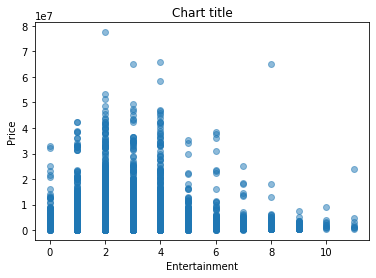

In [33]:
plt.scatter(df_main['Entertainment'],df_main['Price'],alpha=0.5 )
#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('Entertainment')
plt.ylabel('Price') 
#Show the plot
plt.show()

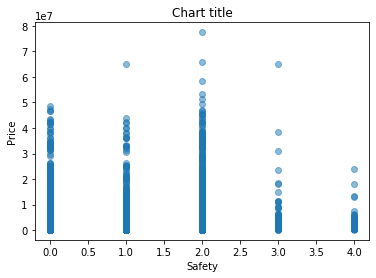

In [34]:
plt.scatter(df_main['Safety'],df_main['Price'],alpha=0.5 )
#aesthetics
plt.title('Chart title')
plt.xlabel('Safety')
plt.ylabel('Price') 
#Show plot
plt.show()

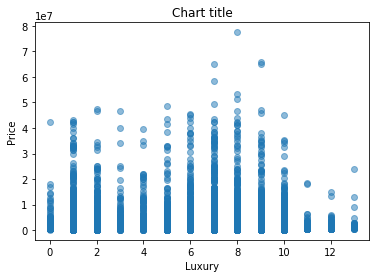

In [35]:
plt.scatter(df_main['Luxury'],df_main['Price'],alpha=0.5 )
#Adding  aesthetics
plt.title('Chart title')
plt.xlabel('Luxury')
plt.ylabel('Price') 
#Show  plot
plt.show()

In [36]:
#converting data type of this variables to make qualitative data to numeric and to create dummy variables
df_main[['Engine Type','Transmission','Body Type','Registered','Entertainment','Safety','Luxury']] = df_main[['Engine Type','Transmission','Body Type','Registered','Entertainment','Safety','Luxury']].astype(str)

In [37]:
df_main=pd.get_dummies(df_main, drop_first = True)
df_main

,Price,Model Year,Mileage,Engine Capacity,Engine Type_2,Engine Type_3,Transmission_2,Assembly_1,Body Type_2,Body Type_3,...,Luxury_12.0,Luxury_13.0,Luxury_2.0,Luxury_3.0,Luxury_4.0,Luxury_5.0,Luxury_6.0,Luxury_7.0,Luxury_8.0,Luxury_9.0
0,2385000,2017,9869,1000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,111000,2019,11111,1300,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1530000,2019,17500,660,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1650000,2019,9600,660,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1435000,2010,120000,1300,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43497,1235000,2006,107000,1800,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
43498,2200000,2011,83000,1500,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
43499,3750000,2014,22000,1500,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
43500,2100000,2007,123455,1500,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


**We worked on the model df_main and found that the newly added feature column did not help in prediction and the corelation can be found below also we ran on the algoritham too and found those columns are less important so we are droping those new columns(Entertainment, Luxury and saftey)**

In [38]:
corr = df_main.corr()

corr.style.background_gradient(cmap='coolwarm')

,Price,Model Year,Mileage,Engine Capacity,Engine Type_2,Engine Type_3,Transmission_2,Assembly_1,Body Type_2,Body Type_3,Body Type_4,Body Type_5,Body Type_6,Location_trans_Balochistan,Location_trans_Islamabad,Location_trans_KPK,Location_trans_Kashmir,Location_trans_Punjab,Location_trans_Sindh,Registered_1,Entertainment_1.0,Entertainment_10.0,Entertainment_11.0,Entertainment_2.0,Entertainment_3.0,Entertainment_4.0,Entertainment_5.0,Entertainment_6.0,Entertainment_7.0,Entertainment_8.0,Entertainment_9.0,Safety_1.0,Safety_2.0,Safety_3.0,Safety_4.0,Luxury_1.0,Luxury_10.0,Luxury_11.0,Luxury_12.0,Luxury_13.0,Luxury_2.0,Luxury_3.0,Luxury_4.0,Luxury_5.0,Luxury_6.0,Luxury_7.0,Luxury_8.0,Luxury_9.0
Price,1.000000,0.222043,-0.189164,0.647041,0.030563,0.091910,-0.341793,0.266149,0.031924,0.515783,-0.046144,0.126380,-0.031704,-0.003603,0.079101,-0.045027,-0.012791,-0.040978,0.021318,-0.208479,-0.000012,0.004050,0.013150,-0.008935,-0.000644,0.013502,-0.006207,0.008129,-0.000161,0.002249,-0.005532,-0.006574,0.012944,0.003267,0.002351,-0.003154,-0.005460,-0.003549,0.000171,0.008193,-0.000753,-0.003661,-0.001542,-0.002599,0.002415,-0.002452,0.004632,0.009484
Model Year,0.222043,1.000000,-0.600646,-0.145564,-0.222179,0.101519,-0.192540,-0.025057,-0.060128,-0.159710,0.008218,0.101555,0.063383,-0.036959,0.015116,-0.146733,-0.036348,0.086846,0.011649,-0.215365,-0.006752,-0.000804,-0.001409,-0.012644,0.010060,0.005421,-0.001392,-0.004215,0.001052,0.008080,0.001349,0.000768,0.003341,0.003750,-0.003212,0.001584,0.001247,-0.000230,0.005591,0.001961,-0.004409,-0.003476,0.005551,-0.005252,-0.005948,0.002183,0.000777,0.003130
Mileage,-0.189164,-0.600646,1.000000,0.096465,0.146857,-0.069709,0.164604,-0.028101,0.166046,0.034934,-0.004054,-0.089178,-0.037166,0.008859,0.005211,0.101132,0.037399,-0.023202,-0.066868,0.213681,0.002785,0.001758,0.004390,0.008546,-0.003832,-0.003826,0.004828,0.004805,-0.001406,-0.009366,-0.002906,0.001594,-0.004839,-0.004505,0.001922,-0.001059,0.003797,-0.005001,-0.003129,0.003800,0.005571,0.002896,-0.009350,0.008530,0.005183,-0.000281,-0.004954,-0.006010
Engine Capacity,0.647041,-0.145564,0.096465,1.000000,0.336971,0.071624,-0.337751,0.199757,0.313953,0.647432,-0.102530,0.074372,-0.046043,0.024237,0.068912,0.003088,0.027416,-0.047629,-0.014518,-0.017613,0.004994,0.009047,0.014246,-0.002740,-0.002710,0.009455,-0.007522,0.006661,-0.004729,-0.004281,-0.005157,-0.006810,0.007788,-0.005513,0.007006,-0.002252,-0.002087,-0.002338,0.000414,0.008101,0.002982,-0.001613,-0.007260,0.000145,0.002803,-0.002415,-0.000194,0.005897
Engine Type_2,0.030563,-0.222179,0.146857,0.336971,1.000000,-0.025767,-0.010937,0.079794,-0.009659,0.356994,-0.017602,-0.023593,0.007201,0.008287,0.021694,0.000214,0.154515,-0.016092,-0.031165,0.030781,-0.003382,-0.002214,0.009878,0.004235,-0.000764,0.004251,-0.002303,0.001406,-0.008036,-0.007149,-0.001989,-0.001018,0.003474,-0.003375,0.001221,0.000660,-0.000880,-0.003055,-0.004245,0.001970,0.005531,-0.000467,-0.007975,-0.005277,0.001557,-0.002670,0.005296,0.001838
Engine Type_3,0.091910,0.101519,-0.069709,0.071624,-0.025767,1.000000,-0.189690,0.256852,-0.066412,-0.037385,0.056265,0.413272,-0.005130,-0.002487,0.006364,-0.014992,-0.009270,-0.022131,0.037077,-0.221122,-0.007098,-0.002676,-0.002394,0.007142,-0.003852,0.003041,-0.004646,0.006153,0.000346,0.007225,-0.003882,-0.008575,0.011472,0.009240,-0.004544,-0.008251,0.010044,-0.005749,-0.003666,-0.004788,-0.002934,0.002581,0.003762,-0.002105,-0.002616,0.002277,0.002107,0.000739
Transmission_2,-0.341793,-0.192540,0.164604,-0.337751,-0.010937,-0.189690,1.000000,-0.625735,-0.072899,-0.198246,0.004472,-0.172574,0.063598,-0.031469,-0.040968,-0.017839,0.039989,0.105001,-0.083292,0.254644,0.003991,-0.004245,-0.004477,0.007931,-0.003714,-0.011568,0.007686,-0.006487,0.006786,-0.002561,0.001308,0.004895,-0.014600,0.004934,-0.000876,0.006816,-0.007298,0.004427,0.001430,0.001250,0.008889,0.003941,0.004277,-0.003489,0.002119,-0.000832,-0.001737,-0.007633
Assembly_1,0.266149,-0.0250

#PART - 2
**AGAIN WE START FROM THE BEGINING **

df(data frame is not operated for features nul values so we take the process df and work further for better model prediction)

In [39]:
df

,Ad No,Name,Price,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features,Last Updated,URL,manufacturer_name,Location_trans,Registered
0,4096758,Toyota Vitz F 1.0 2017,2385000,2017,"G- 8, Islamabad Islamabad",9869,Un-Registered,1,1000,1,Silver,1,1,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",11-Jul-20,https://www.pakwheels.com/used-cars/toyota-vit...,Toyota,Islamabad,0
1,4168305,Toyota Corolla GLi Automatic 1.3 VVTi 2019,111000,2019,Peshawar KPK,11111,Islamabad,1,1300,1,White,0,2,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",12-Jul-20,https://www.pakwheels.com/used-cars/toyota-cor...,Toyota,KPK,1
2,4168298,Suzuki Alto VXL 2019,1530000,2019,"Akora Khattak, Nowshera KPK",17500,Un-Registered,1,660,1,White,0,1,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",12-Jul-20,https://www.pakwheels.com/used-cars/suzuki-alt...,Suzuki,KPK,0
3,4168307,Suzuki Alto VXR 2019,1650000,2019,"Abdullahpur, Faisalabad Punjab",9600,Lahore,1,660,2,White,0,1,"AM/FM Radio, Air Bags, Air Conditioning, DVD ...",12-Jul-20,https://www.pakwheels.com/used-cars/suzuki-alt...,Suzuki,Punjab,1
4,4168306,Toyota Corolla XLi VVTi 2010,1435000,2010,"9th Avenue, Islamabad Islamabad",120000,Islamabad,1,1300,2,Black,0,2,"AM/FM Radio, Air Conditioning, CD Player, Key...",12-Jul-20,https://www.pakwheels.com/used-cars/toyota-cor...,Toyota,Islamabad,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46018,3448128,Honda Vezel Hybrid X 2015,3400000,2015,Lahore Punjab,32000,Un-Registered,1,1500,1,Black,1,5,NaN,28-Jul-19,https://www.pakwheels.com/used-cars/honda-veze...,Honda,Punjab,0
46019,3737684,Toyota Aqua S 2015,2450000,2015,Rawalpindi Punjab,52000,Un-Registered,1,1500,1,Blue,1,1,NaN,18-Dec-19,https://www.pakwheels.com/used-cars/toyota-aqu...,Toyota,Punjab,0
46020,3349017,Honda Civic VTi Prosmatec 1.8 i-VTEC 2015,3250000,2015,Lahore Punjab,125000,Lahore,1,1800,1,Black,0,2,NaN,4-Jun-19,https://www.pakwheels.com/used-cars/honda-civi...,Honda,Punjab,1
46021,3748215,Toyota Aqua G 2016,3000000,2016,Gujranwala Punjab,60000,Lahore,1,1500,1,Black,1,1,NaN,22-Dec-19,https://www.pakwheels.com/used-cars/toyota-aqu...,Toyota,Punjab,1


In [40]:
df_2 = df.copy()
df_2

,Ad No,Name,Price,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features,Last Updated,URL,manufacturer_name,Location_trans,Registered
0,4096758,Toyota Vitz F 1.0 2017,2385000,2017,"G- 8, Islamabad Islamabad",9869,Un-Registered,1,1000,1,Silver,1,1,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",11-Jul-20,https://www.pakwheels.com/used-cars/toyota-vit...,Toyota,Islamabad,0
1,4168305,Toyota Corolla GLi Automatic 1.3 VVTi 2019,111000,2019,Peshawar KPK,11111,Islamabad,1,1300,1,White,0,2,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",12-Jul-20,https://www.pakwheels.com/used-cars/toyota-cor...,Toyota,KPK,1
2,4168298,Suzuki Alto VXL 2019,1530000,2019,"Akora Khattak, Nowshera KPK",17500,Un-Registered,1,660,1,White,0,1,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",12-Jul-20,https://www.pakwheels.com/used-cars/suzuki-alt...,Suzuki,KPK,0
3,4168307,Suzuki Alto VXR 2019,1650000,2019,"Abdullahpur, Faisalabad Punjab",9600,Lahore,1,660,2,White,0,1,"AM/FM Radio, Air Bags, Air Conditioning, DVD ...",12-Jul-20,https://www.pakwheels.com/used-cars/suzuki-alt...,Suzuki,Punjab,1
4,4168306,Toyota Corolla XLi VVTi 2010,1435000,2010,"9th Avenue, Islamabad Islamabad",120000,Islamabad,1,1300,2,Black,0,2,"AM/FM Radio, Air Conditioning, CD Player, Key...",12-Jul-20,https://www.pakwheels.com/used-cars/toyota-cor...,Toyota,Islamabad,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46018,3448128,Honda Vezel Hybrid X 2015,3400000,2015,Lahore Punjab,32000,Un-Registered,1,1500,1,Black,1,5,NaN,28-Jul-19,https://www.pakwheels.com/used-cars/honda-veze...,Honda,Punjab,0
46019,3737684,Toyota Aqua S 2015,2450000,2015,Rawalpindi Punjab,52000,Un-Registered,1,1500,1,Blue,1,1,NaN,18-Dec-19,https://www.pakwheels.com/used-cars/toyota-aqu...,Toyota,Punjab,0
46020,3349017,Honda Civic VTi Prosmatec 1.8 i-VTEC 2015,3250000,2015,Lahore Punjab,125000,Lahore,1,1800,1,Black,0,2,NaN,4-Jun-19,https://www.pakwheels.com/used-cars/honda-civi...,Honda,Punjab,1
46021,3748215,Toyota Aqua G 2016,3000000,2016,Gujranwala Punjab,60000,Lahore,1,1500,1,Black,1,1,NaN,22-Dec-19,https://www.pakwheels.com/used-cars/toyota-aqu...,Toyota,Punjab,1


In [41]:
df_3 = df.copy()

In [42]:
#Removing unnecessary columns and less correlated variables and move further for better model prediction per the model worked earlier which is not shown here


drop_columns=['Name','Last Updated','URL','Color','Ad No','Features','Registered City','Location','manufacturer_name','Location_trans']
df_2.drop(columns=drop_columns, inplace=True)
df_2

,Price,Model Year,Mileage,Engine Type,Engine Capacity,Transmission,Assembly,Body Type,Registered
0,2385000,2017,9869,1,1000,1,1,1,0
1,111000,2019,11111,1,1300,1,0,2,1
2,1530000,2019,17500,1,660,1,0,1,0
3,1650000,2019,9600,1,660,2,0,1,1
4,1435000,2010,120000,1,1300,2,0,2,1
...,...,...,...,...,...,...,...,...,...
46018,3400000,2015,32000,1,1500,1,1,5,0
46019,2450000,2015,52000,1,1500,1,1,1,0
46020,3250000,2015,125000,1,1800,1,0,2,1
46021,3000000,2016,60000,1,1500,1,1,1,1


In [43]:
df_2.dtypes

Price               int64
Model Year          int64
Mileage             int64
Engine Type         int64
Engine Capacity     int64
Transmission        int64
Assembly           object
Body Type           int64
Registered         object
dtype: object

In [44]:
#converting data type of this variables to make qualitative data to numeric and to create dummy variables
df_2[['Engine Type','Transmission','Body Type','Assembly','Registered']] = df[['Engine Type','Transmission','Body Type','Assembly','Registered',]].astype(str)

In [45]:
df_2=pd.get_dummies(df_2, drop_first = True)
df_2

,Price,Model Year,Mileage,Engine Capacity,Engine Type_2,Engine Type_3,Transmission_2,Assembly_1,Body Type_2,Body Type_3,Body Type_4,Body Type_5,Body Type_6,Registered_1
0,2385000,2017,9869,1000,0,0,0,1,0,0,0,0,0,0
1,111000,2019,11111,1300,0,0,0,0,1,0,0,0,0,1
2,1530000,2019,17500,660,0,0,0,0,0,0,0,0,0,0
3,1650000,2019,9600,660,0,0,1,0,0,0,0,0,0,1
4,1435000,2010,120000,1300,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46018,3400000,2015,32000,1500,0,0,0,1,0,0,0,1,0,0
46019,2450000,2015,52000,1500,0,0,0,1,0,0,0,0,0,0
46020,3250000,2015,125000,1800,0,0,0,0,1,0,0,0,0,1
46021,3000000,2016,60000,1500,0,0,0,1,0,0,0,0,0,1


**EDA on the new model**

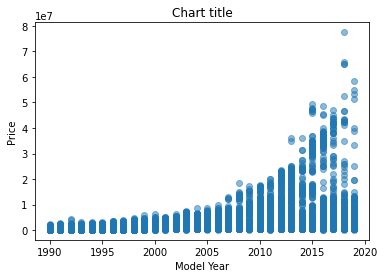

In [46]:
#as the year gradually(new car) increases the price also increases 
plt.scatter(df_3['Model Year'],df_3['Price'],alpha=0.5 )
#Adding aesthetics
plt.title('Chart title')
plt.xlabel('Model Year')
plt.ylabel('Price') 
#Show plot
plt.show()

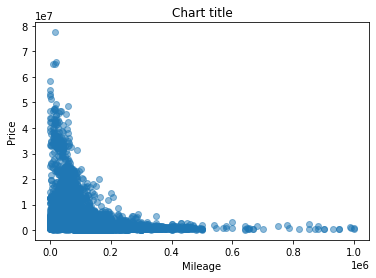

In [47]:
#as the km driven decreases the value increases
plt.scatter(df_3['Mileage'],df_3['Price'],alpha=0.5 )
#Adding aesthetics
plt.title('Chart title')
plt.xlabel('Mileage')
plt.ylabel('Price') 
#Show plot
plt.show()

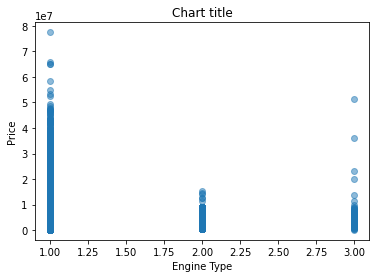

In [48]:
#petrol cars are most popularly listed on the website
plt.scatter(df_3['Engine Type'],df_3['Price'],alpha=0.5 )
#Adding aesthetics
plt.title('Chart title')
plt.xlabel('Engine Type')
plt.ylabel('Price') 
#Show plot
plt.show()

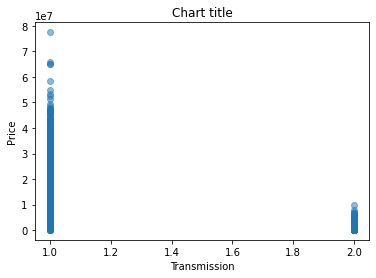

In [49]:
#Automatic transmission are more listed
plt.scatter(df_3['Transmission'],df_3['Price'],alpha=0.5 )
#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('Transmission')
plt.ylabel('Price') 
#Show the plot
plt.show()

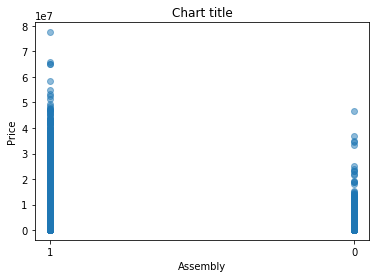

In [50]:
#More imported cars are used and listed on the website
plt.scatter(df_3['Assembly'],df_3['Price'],alpha=0.5 )
#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('Assembly')
plt.ylabel('Price') 
#Show the plot
plt.show()

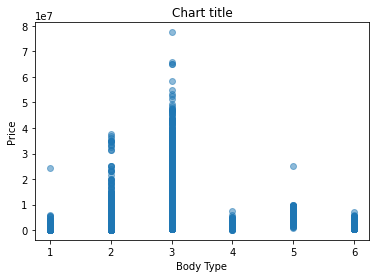

In [51]:
#SUV are most popular in the country
plt.scatter(df_3['Body Type'],df_3['Price'],alpha=0.5 )
#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('Body Type')
plt.ylabel('Price') 
#Show the plot
plt.show()

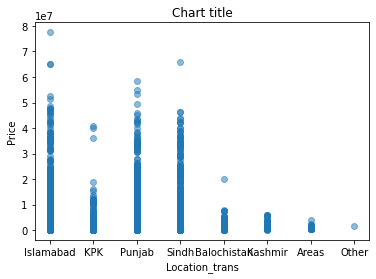

In [52]:
#punjab, islamabad and sindh are most choosed location for used car listing
plt.scatter(df_3['Location_trans'],df_3['Price'],alpha=0.5 )
#Adding aesthetics
plt.title('Chart title')
plt.xlabel('Location_trans')
plt.ylabel('Price') 
#Show  plot
plt.show()		

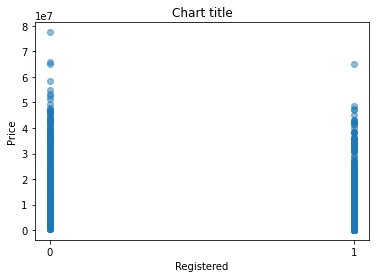

In [53]:
#surprisingly there are more unregestered car can be found in the 
plt.scatter(df_3['Registered'],df_3['Price'],alpha=0.5 )
#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('Registered')
plt.ylabel('Price') 
#Show the plot
plt.show()

#DATA cleaning and transformation

In [54]:
list_features =['Price','Model Year','Mileage', 'Engine Capacity']

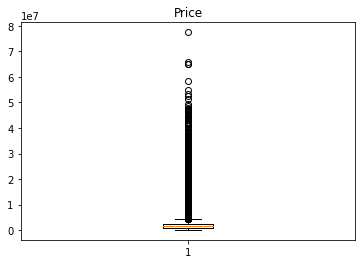

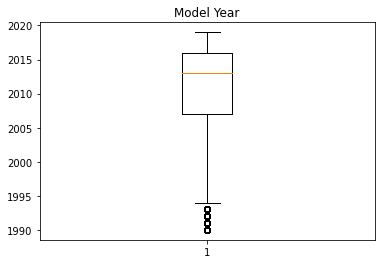

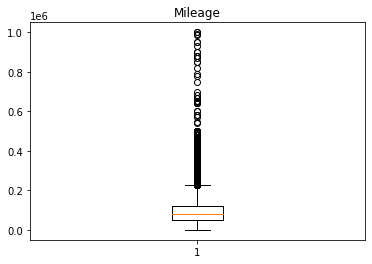

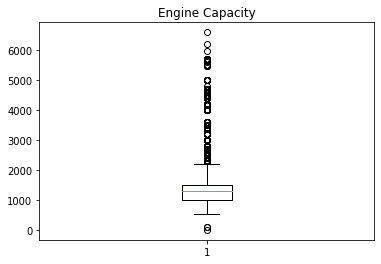

In [55]:
#more skewness and outliers found in the dataset
#Box plot to check skewness and outliers
for feature in list_features:
    plt.boxplot(df_2[feature])
    plt.title(feature)
    plt.show()

**Outliers removal**

Looks like Price has many outliers

In [56]:
df_4 = df_2.copy()
df_4

,Price,Model Year,Mileage,Engine Capacity,Engine Type_2,Engine Type_3,Transmission_2,Assembly_1,Body Type_2,Body Type_3,Body Type_4,Body Type_5,Body Type_6,Registered_1
0,2385000,2017,9869,1000,0,0,0,1,0,0,0,0,0,0
1,111000,2019,11111,1300,0,0,0,0,1,0,0,0,0,1
2,1530000,2019,17500,660,0,0,0,0,0,0,0,0,0,0
3,1650000,2019,9600,660,0,0,1,0,0,0,0,0,0,1
4,1435000,2010,120000,1300,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46018,3400000,2015,32000,1500,0,0,0,1,0,0,0,1,0,0
46019,2450000,2015,52000,1500,0,0,0,1,0,0,0,0,0,0
46020,3250000,2015,125000,1800,0,0,0,0,1,0,0,0,0,1
46021,3000000,2016,60000,1500,0,0,0,1,0,0,0,0,0,1


In [57]:
#first we operate price by IQR method aroind 2k columns are removed
sorted(df_4)

q1, q3= np.percentile(df_4['Price'],[25,75])
q3
q1

iqr = q3 - q1

lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
iqr

quar=(df_4['Price']< (q1 - 1.5 * iqr)) |(df_4['Price'] > (q3 + 1.5 * iqr))
quar

upper = np.where(df_4['Price'] >= (q3+1.5*iqr))

lower = np.where(df_4['Price'] <= (q1-1.5*iqr))

df_4.drop(upper[0], inplace = True)

df_4.drop(lower[0], inplace = True)

In [58]:
#remove outliers 38+33 values removed
df_4=df_4[~(df_4["Mileage"]>=500000)]
df_4=df_4[~(df_4["Mileage"]<=15)]
df_4

,Price,Model Year,Mileage,Engine Capacity,Engine Type_2,Engine Type_3,Transmission_2,Assembly_1,Body Type_2,Body Type_3,Body Type_4,Body Type_5,Body Type_6,Registered_1
0,2385000,2017,9869,1000,0,0,0,1,0,0,0,0,0,0
1,111000,2019,11111,1300,0,0,0,0,1,0,0,0,0,1
2,1530000,2019,17500,660,0,0,0,0,0,0,0,0,0,0
3,1650000,2019,9600,660,0,0,1,0,0,0,0,0,0,1
4,1435000,2010,120000,1300,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46018,3400000,2015,32000,1500,0,0,0,1,0,0,0,1,0,0
46019,2450000,2015,52000,1500,0,0,0,1,0,0,0,0,0,0
46020,3250000,2015,125000,1800,0,0,0,0,1,0,0,0,0,1
46021,3000000,2016,60000,1500,0,0,0,1,0,0,0,0,0,1


In [59]:
#remove outliers 48+655 values removed
df_4=df_4[~(df_4["Engine Capacity"]>=3500)]
df_4=df_4[~(df_4["Engine Capacity"]<=600)]
df_4

,Price,Model Year,Mileage,Engine Capacity,Engine Type_2,Engine Type_3,Transmission_2,Assembly_1,Body Type_2,Body Type_3,Body Type_4,Body Type_5,Body Type_6,Registered_1
0,2385000,2017,9869,1000,0,0,0,1,0,0,0,0,0,0
1,111000,2019,11111,1300,0,0,0,0,1,0,0,0,0,1
2,1530000,2019,17500,660,0,0,0,0,0,0,0,0,0,0
3,1650000,2019,9600,660,0,0,1,0,0,0,0,0,0,1
4,1435000,2010,120000,1300,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46018,3400000,2015,32000,1500,0,0,0,1,0,0,0,1,0,0
46019,2450000,2015,52000,1500,0,0,0,1,0,0,0,0,0,0
46020,3250000,2015,125000,1800,0,0,0,0,1,0,0,0,0,1
46021,3000000,2016,60000,1500,0,0,0,1,0,0,0,0,0,1


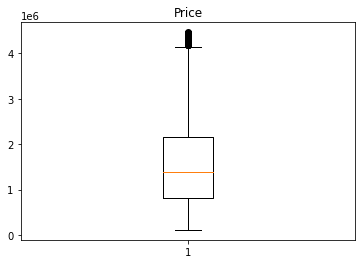

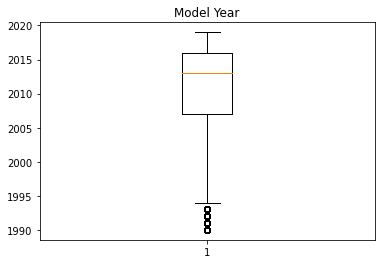

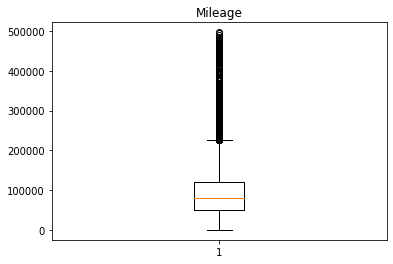

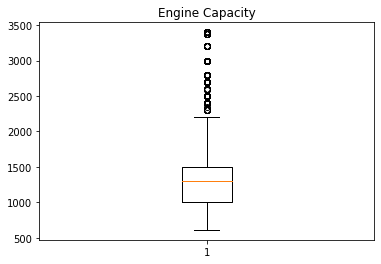

In [60]:
#Box plot to check skewness and outliers
for feature in list_features:
    plt.boxplot(df_4[feature])
    plt.title(feature)
    plt.show()

In [61]:
#check for skew
for feature in list_features:
    print(feature ," - ", df[feature].skew())

Price  -  8.650125254555974
Model Year  -  -0.9783472094799159
Mileage  -  2.33710355302869
Engine Capacity  -  2.54512108475022


In [62]:
df_4

,Price,Model Year,Mileage,Engine Capacity,Engine Type_2,Engine Type_3,Transmission_2,Assembly_1,Body Type_2,Body Type_3,Body Type_4,Body Type_5,Body Type_6,Registered_1
0,2385000,2017,9869,1000,0,0,0,1,0,0,0,0,0,0
1,111000,2019,11111,1300,0,0,0,0,1,0,0,0,0,1
2,1530000,2019,17500,660,0,0,0,0,0,0,0,0,0,0
3,1650000,2019,9600,660,0,0,1,0,0,0,0,0,0,1
4,1435000,2010,120000,1300,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46018,3400000,2015,32000,1500,0,0,0,1,0,0,0,1,0,0
46019,2450000,2015,52000,1500,0,0,0,1,0,0,0,0,0,0
46020,3250000,2015,125000,1800,0,0,0,0,1,0,0,0,0,1
46021,3000000,2016,60000,1500,0,0,0,1,0,0,0,0,0,1


In [63]:
#there is a presence of skewness, data needs transformation
from scipy import stats
from pylab import *
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=plt)
    plt.show()

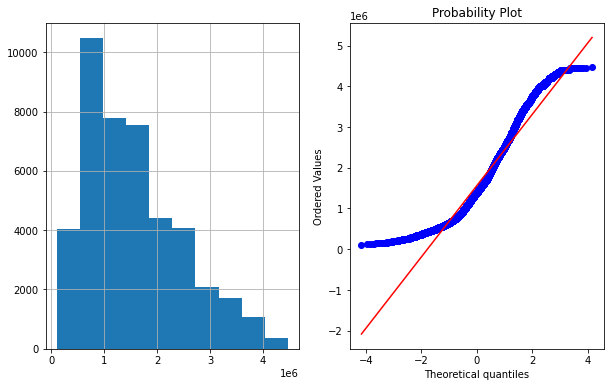

In [64]:
plot_data(df_4,'Price')

Tried other menthod too better transformations was found to be BOXCOX

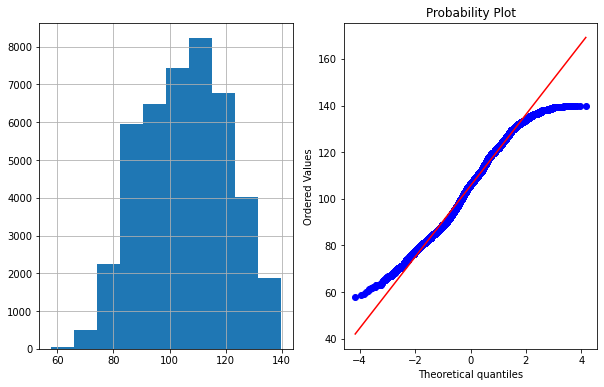

In [65]:
df_4['Price'],parameters=stats.boxcox(df_4['Price'])
plot_data(df_4,'Price')

In [66]:
df_4.describe()

,Price,Model Year,Mileage,Engine Capacity,Engine Type_2,Engine Type_3,Transmission_2,Assembly_1,Body Type_2,Body Type_3,Body Type_4,Body Type_5,Body Type_6,Registered_1
count,43575.000000,43575.000000,43575.000000,43575.000000,43575.000000,43575.000000,43575.000000,43575.000000,43575.000000,43575.000000,43575.000000,43575.000000,43575.000000,43575.000000
mean,105.586406,2010.991165,91643.208881,1227.016959,0.017372,0.028732,0.562570,0.294710,0.422513,0.020929,0.027309,0.019782,0.015582,0.935605
std,15.383268,6.399954,60776.982860,428.967406,0.130656,0.167054,0.496075,0.455918,0.493965,0.143150,0.162985,0.139252,0.123854,0.245458
min,57.703411,1990.000000,16.000000,610.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.331448,2007.000000,50000.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,106.236413,2013.000000,81000.000000,1300.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,117.712490,2016.000000,120000.000000,1500.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,139.869222,2019.000000,496649.000000,3400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
list_Indpndt_features = [feature for feature in df_4.columns if 'Price' not in feature ]
list_Indpndt_features

['Model Year',
 'Mileage',
 'Engine Capacity',
 'Engine Type_2',
 'Engine Type_3',
 'Transmission_2',
 'Assembly_1',
 'Body Type_2',
 'Body Type_3',
 'Body Type_4',
 'Body Type_5',
 'Body Type_6',
 'Registered_1']

In [68]:
#Assumptions of Dependent and Independent Features
#Null Hypothesis 1 : - The Independent features are Highly corelated with each othe
for i in range (0,len(list_Indpndt_features)):
    for j in range (i+1 , len(list_Indpndt_features)):
        correlation  = df_4[list_Indpndt_features[i]].corr(df_4[list_Indpndt_features[j]])
        if (correlation>=0.5):
            print( list_Indpndt_features[i],' & ', list_Indpndt_features[j] , " = " , correlation)

Engine Capacity  &  Body Type_2  =  0.5909332723835279


In [69]:
# one column will be dropped due to the presence of high correlation 

In [70]:
new_features=['Body Type_2']
df_4.drop(columns=new_features, inplace=True)

In [71]:
corr = df_4.corr()

corr.style.background_gradient(cmap='coolwarm')

,Price,Model Year,Mileage,Engine Capacity,Engine Type_2,Engine Type_3,Transmission_2,Assembly_1,Body Type_3,Body Type_4,Body Type_5,Body Type_6,Registered_1
Price,1.000000,0.580285,-0.340977,0.521574,0.019212,0.246934,-0.601333,0.306001,0.096656,-0.076903,0.258230,-0.048802,-0.250074
Model Year,0.580285,1.000000,-0.621394,-0.185179,-0.229588,0.092388,-0.192953,-0.026132,-0.228478,0.011540,0.080797,0.062885,-0.206568
Mileage,-0.340977,-0.621394,1.000000,0.188835,0.165263,-0.062155,0.153546,-0.011580,0.104047,-0.006835,-0.066943,-0.041057,0.209781
Engine Capacity,0.521574,-0.185179,0.188835,1.000000,0.375870,0.117402,-0.289588,0.052051,0.360052,-0.121087,0.090904,-0.048889,0.064057
Engine Type_2,0.019212,-0.229588,0.165263,0.375870,1.000000,-0.022869,0.018105,0.066999,0.412472,-0.015813,-0.018889,0.008799,0.029874
Engine Type_3,0.246934,0.092388,-0.062155,0.117402,-0.022869,1.000000,-0.193943,0.263361,-0.023228,0.057998,0.413589,-0.006111,-0.202255
Transmission_2,-0.601333,-0.192953,0.153546,-0.289588,0.018105,-0.193943,1.000000,-0.613948,-0.088247,-0.004104,-0.159776,0.063504,0.249646
Assembly_1,0.306001,-0.026132,-0.011580,0.052051,0.066999,0.263361,-0.613948,1.000000,0.179414,0.072978,0.217235,-0.019959,-0.316642
Body Type_3,0.096656,-0.228478,0.104047,0.360052,0.412472,-0.023228,-0.088247,0.179414,1.000000,-0.024498,-0.020770,-0.018395,0.016804
Body Type_4,-0.076903,0.011540,-0.006835,-0.121087,-0.015813,0.057998,-0.004104,0.072978,-0.024498,1.000000,-0.023804,-0.021081,-0.058725


In [72]:
df_evaulation = df_4.copy()

In [75]:
df_evaulation_3 = df_4.copy()


In [76]:
df_evaulation_2 = df_4.copy()


In [77]:
#installing or importing important matrix to perform operations on the data
#using SK learn lib for evaulation
#seaborn for plot


import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


import seaborn as sns
import matplotlib.pyplot  as plt
%matplotlib inline

In [78]:
#using function to call the model at one place to draw the results


def Results(model, prediction, Name):
    R2 = model.score(X_Train, Y_Train) #Gives the adjusted R squared value
    Adj_R2 = 1 - (1-model.score(X_Train, Y_Train))*(len(Y_Train)-1)/(len(Y_Train)-X_Train.shape[1]-1) #Formula for the adjusred R square value

#                           $$-------------------------------------$$
    import math
    MSE = np.square(np.subtract(Y_Test,prediction)).mean()    #Gives the Means square value
    RMSE = math.sqrt(MSE)   #Gives the root Means square value

#                           $$-------------------------------------$$
    Accuracy = model.score(X_Test,Y_Test)

    print('Below are the Results of the Model' + Name )

    print("The Accuracy of the model is:\n")
    print(Accuracy)

    print("The Mean Square Error Value of the model\n")
    print(MSE)

    print("The Root Mean Square Error of the model\n")
    print(RMSE)

    print("The R - Squared Value of the model:\n")
    print(R2)

    print("The Adjusted R - Square Value of the model:\n")
    print(Adj_R2)

In [79]:
#Model Evaualation of the same called here 
def Model_Evaluation(model, Name):


    model.fit(X_Train,Y_Train)  #Fit the model dependent and independent variable

    prediction = model.predict(X_Test)  #give the model prediction for the test data

    Results(model, prediction, Name) #call function


In [80]:
#delete column callout
def Data_Delete(Dataframe, columns):

    Dataframe.drop(columns, axis=1, inplace=True)
    return Dataframe
    

#Modeling

In [81]:
# Data preperation fro Modelling Creating a Dataframe without target variable

from sklearn.model_selection import train_test_split

Y = df_evaulation['Price']
Y

columns =['Price']

X = Data_Delete(df_evaulation, columns)
X

,Model Year,Mileage,Engine Capacity,Engine Type_2,Engine Type_3,Transmission_2,Assembly_1,Body Type_3,Body Type_4,Body Type_5,Body Type_6,Registered_1
0,2017,9869,1000,0,0,0,1,0,0,0,0,0
1,2019,11111,1300,0,0,0,0,0,0,0,0,1
2,2019,17500,660,0,0,0,0,0,0,0,0,0
3,2019,9600,660,0,0,1,0,0,0,0,0,1
4,2010,120000,1300,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
46018,2015,32000,1500,0,0,0,1,0,0,1,0,0
46019,2015,52000,1500,0,0,0,1,0,0,0,0,0
46020,2015,125000,1800,0,0,0,0,0,0,0,0,1
46021,2016,60000,1500,0,0,0,1,0,0,0,0,1


In [82]:
# Creating a Dataframes of Training and Test sets in 75:25 Ratio using  sklearn - train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size = 0.25,  random_state=0 )

In [83]:
# Data preperation for Modelling :: checking the lengths of Train and Test Sets

print('Length of X Train :', len(X_Train) )
print('Length of X Test  :', len(X_Test) )

Length of X Train : 32681
Length of X Test  : 10894


In [84]:
#feature transformetion is done for the lasso and KNN regression
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_Train= sc.fit_transform(X_Train)
X_Test= sc.transform(X_Test)

In [85]:
X_Train

array([[0.51724138, 0.25431053, 0.30656934, ..., 0.        , 0.        ,
        1.        ],
       [0.65517241, 0.25483808, 0.12408759, ..., 0.        , 0.        ,
        1.        ],
       [0.65517241, 0.17581796, 0.05109489, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.96551724, 0.11071355, 0.05109489, ..., 0.        , 0.        ,
        1.        ],
       [0.96551724, 0.06037456, 0.12408759, ..., 0.        , 0.        ,
        1.        ],
       [0.86206897, 0.09951413, 0.30656934, ..., 0.        , 0.        ,
        1.        ]])

**Lasso regression (min max scalar transformatin is used and grid method is used here**

In [86]:
#Implementing the Lasso Regression Model
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet, ElasticNetCV

Lasso_model = Lasso(alpha=0.1) #random alpha value

Model_Evaluation(Lasso_model, 'Lasso')

Below are the Results of the ModelLasso
The Accuracy of the model is:

0.857112107759701
The Mean Square Error Value of the model

34.15166149503487
The Root Mean Square Error of the model

5.843942290529132
The R - Squared Value of the model:

0.8562142863309613
The Adjusted R - Square Value of the model:

0.8561614692450048


In [87]:
from scipy.stats import uniform 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import RidgeCV, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
alphas=np.arange(0.0001,0.01,0.0005)
cv=RepeatedKFold(n_splits=10,n_repeats=3, random_state=100)

hyper_param = {'alpha':alphas}

model = Lasso()
rand_search = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=cv,
                        verbose=1,
                        return_train_score=True
                       )

rand_search.fit(X_Train,Y_Train)

print(rand_search.best_estimator_.alpha)
print(rand_search.best_score_)
print(rand_search.best_params_)

Fitting 30 folds for each of 20 candidates, totalling 600 fits
0.0001
0.8678436523011942
{'alpha': 0.0001}


In [88]:
#Implementing the Lasso Regression Model
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet, ElasticNetCV

Lasso_model = Lasso(alpha=0.0001) #random alpha value

Model_Evaluation(Lasso_model, 'Lasso')

Below are the Results of the ModelLasso
The Accuracy of the model is:

0.866981534546735
The Mean Square Error Value of the model

31.792767977213252
The Root Mean Square Error of the model

5.638507601946924
The R - Squared Value of the model:

0.8680619643205656
The Adjusted R - Square Value of the model:

0.8680134992652162


**KNN**

In [89]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 

In [90]:
rmse_val2 = [] #to store rmse values for different k
model_Knn = neighbors.KNeighborsRegressor(n_neighbors = 2)
Model_Evaluation(model_Knn, 'KNN')

Below are the Results of the ModelKNN
The Accuracy of the model is:

0.9058199414540706
The Mean Square Error Value of the model

22.509993174467315
The Root Mean Square Error of the model

4.7444697463960415
The R - Squared Value of the model:

0.9562963647993952
The Adjusted R - Square Value of the model:

0.9562803110580456


In [91]:
rmse_val2 = [] #to store rmse values for different k
for K in range(15):
    K += 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_Train, Y_Train)  #fit the model
    pred=model.predict(X_Test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_Test, pred)) #calculate rmse
    rmse_val2.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 5.413337971047731
RMSE value for k=  2 is: 4.744469746396034
RMSE value for k=  3 is: 4.491864257785978
RMSE value for k=  4 is: 4.352506486510279
RMSE value for k=  5 is: 4.294722331908107
RMSE value for k=  6 is: 4.229267295480335
RMSE value for k=  7 is: 4.199649101629317
RMSE value for k=  8 is: 4.1820252974917995
RMSE value for k=  9 is: 4.176014518213443
RMSE value for k=  10 is: 4.170340013045476
RMSE value for k=  11 is: 4.171027920090155
RMSE value for k=  12 is: 4.176630388561966
RMSE value for k=  13 is: 4.17150727117576
RMSE value for k=  14 is: 4.175910622358275
RMSE value for k=  15 is: 4.1796437607107215


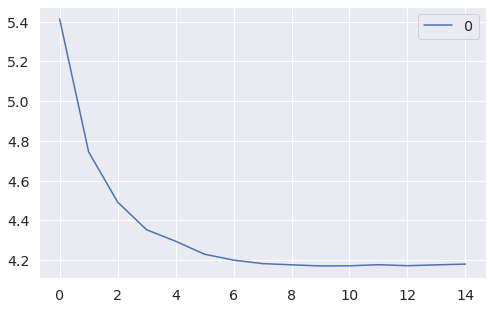

In [92]:
#plotting the rmse values against k values
import seaborn as sns

sns.set(font_scale=1.3)

curve = pd.DataFrame(rmse_val2) #elbow curve 
curve.plot(figsize=(8,5))

In [93]:
rmse_val2 = [] #to store rmse values for different k
model_Knn = neighbors.KNeighborsRegressor(n_neighbors = 10)
Model_Evaluation(model_Knn, 'KNN')

Below are the Results of the ModelKNN
The Accuracy of the model is:

0.9272343316382697
The Mean Square Error Value of the model

17.391735824408176
The Root Mean Square Error of the model

4.170340013045481
The R - Squared Value of the model:

0.9390248350091278
The Adjusted R - Square Value of the model:

0.9390024368831363


**for next algorithams min max scalar is not used as they dont need it**

**Random forest**

In [94]:
# Data preperation fro Modelling Creating a Dataframe without target variable

from sklearn.model_selection import train_test_split

Y2 = df_evaulation_3['Price']
Y2

columns =['Price']

X2= Data_Delete(df_evaulation_3, columns)
X2

,Model Year,Mileage,Engine Capacity,Engine Type_2,Engine Type_3,Transmission_2,Assembly_1,Body Type_3,Body Type_4,Body Type_5,Body Type_6,Registered_1
0,2017,9869,1000,0,0,0,1,0,0,0,0,0
1,2019,11111,1300,0,0,0,0,0,0,0,0,1
2,2019,17500,660,0,0,0,0,0,0,0,0,0
3,2019,9600,660,0,0,1,0,0,0,0,0,1
4,2010,120000,1300,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
46018,2015,32000,1500,0,0,0,1,0,0,1,0,0
46019,2015,52000,1500,0,0,0,1,0,0,0,0,0
46020,2015,125000,1800,0,0,0,0,0,0,0,0,1
46021,2016,60000,1500,0,0,0,1,0,0,0,0,1


In [95]:
# Creating a Dataframes of Training and Test sets in 75:25 Ratio using  sklearn - train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X2,Y2,test_size = 0.25,  random_state=0 )

In [97]:
#rechecking the posibility of scaling(from the column 1,2,3 it confirmed the values are not scaled)
X_Train

,Model Year,Mileage,Engine Capacity,Engine Type_2,Engine Type_3,Transmission_2,Assembly_1,Body Type_3,Body Type_4,Body Type_5,Body Type_6,Registered_1
26641,2005,126315,1500,0,0,0,0,0,0,0,0,1
17028,2009,126577,1000,0,0,1,1,0,0,0,0,1
11461,2009,87333,800,0,0,1,0,0,0,0,0,1
374,2004,123456,1300,0,0,1,0,0,0,0,0,1
733,2005,93000,1800,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32063,2005,23000,800,0,0,1,0,0,0,0,0,1
22508,2017,12000,1000,0,0,1,0,0,1,0,0,1
45020,2018,55000,800,0,0,1,0,0,0,0,0,1
46015,2018,30000,1000,0,0,1,0,0,0,0,0,1


In [98]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

#estimator give no of trees
#This parameter makes a solution easy to replicate
rf = RandomForestRegressor(n_estimators = 10, random_state = 42,max_depth = 2 , min_samples_split=5 , min_impurity_decrease = 0, n_jobs =-1)

Model_Evaluation(rf, 'RandomForestRegressor')

Below are the Results of the ModelRandomForestRegressor
The Accuracy of the model is:

0.6063153286360505
The Mean Square Error Value of the model

94.09464595918728
The Root Mean Square Error of the model

9.700239479476126
The R - Squared Value of the model:

0.5989671189351492
The Adjusted R - Square Value of the model:

0.5988198067466841


In [99]:
#takin the list of features dependent variables
features = X
feature_list = list(features.columns)
features = np.array(features)
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Transmission_2       Importance: 0.63
Variable: Model Year           Importance: 0.33
Variable: Engine Capacity      Importance: 0.04
Variable: Mileage              Importance: 0.0
Variable: Engine Type_2        Importance: 0.0
Variable: Engine Type_3        Importance: 0.0
Variable: Assembly_1           Importance: 0.0
Variable: Body Type_3          Importance: 0.0
Variable: Body Type_4          Importance: 0.0
Variable: Body Type_5          Importance: 0.0
Variable: Body Type_6          Importance: 0.0
Variable: Registered_1         Importance: 0.0


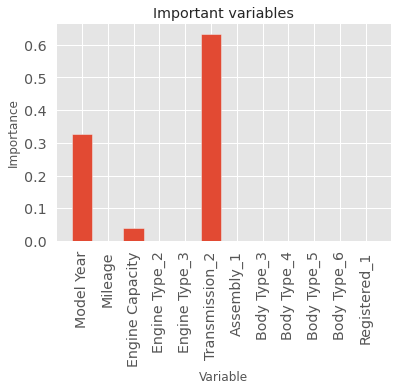

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('ggplot')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Important variables');

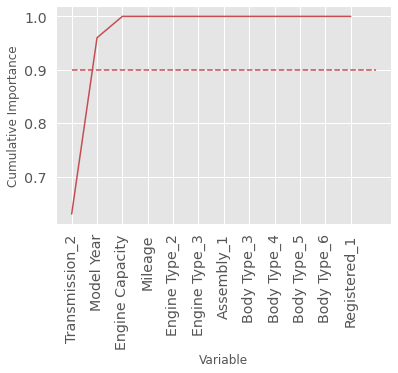

In [101]:
# sorth important variables in assending order
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'r-')
# Draw line at 90% of importance retained
plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance');

In [102]:
# New random forest with only the most important variables
from sklearn.ensemble import RandomForestRegressor
rf_most_important = RandomForestRegressor(n_estimators=200, random_state=0)

In [103]:
Y1 = df_evaulation_2['Price']
Y1

columns1 =[	'Mileage',	'Engine Type_2',	'Engine Type_3',	'Assembly_1',	'Body Type_3','Body Type_4',	'Body Type_5',	'Body Type_6',	'Registered_1', 'Price']

X1 = Data_Delete(df_evaulation_2, columns1)
X1

,Model Year,Engine Capacity,Transmission_2
0,2017,1000,0
1,2019,1300,0
2,2019,660,0
3,2019,660,1
4,2010,1300,1
...,...,...,...
46018,2015,1500,0
46019,2015,1500,0
46020,2015,1800,0
46021,2016,1500,0


In [104]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X1,Y1,test_size = 0.25,  random_state=0 )

In [105]:
rf_most_important.fit(X_Train, Y_Train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [106]:
from sklearn.ensemble import RandomForestRegressor

#estimator give no of trees
#This parameter makes a solution easy to replicate
rf = RandomForestRegressor(n_estimators = 200, random_state = 0)

Model_Evaluation(rf, 'RandomForestRegressor')

Below are the Results of the ModelRandomForestRegressor
The Accuracy of the model is:

0.9150981495063625
The Mean Square Error Value of the model

20.292406955549055
The Root Mean Square Error of the model

4.504709419657283
The R - Squared Value of the model:

0.9200267977691617
The Adjusted R - Square Value of the model:

0.9200194556139243


**XG Boost**

In [107]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size = 0.25,  random_state=0 )

In [108]:
# Modelling and Implementation :: Importing, modelling and Implementing the XG Boost Model

from xgboost import XGBRegressor

XGBRegressor_model = XGBRegressor()

Model_Evaluation(XGBRegressor_model, 'XGBRegressor')

[12:52:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Below are the Results of the ModelXGBRegressor
The Accuracy of the model is:

0.9253461791130402
The Mean Square Error Value of the model

17.843023507931335
The Root Mean Square Error of the model

4.22410031934983
The R - Squared Value of the model:

0.9249200504644489
The Adjusted R - Square Value of the model:

0.9248924712005079


In [109]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [10, 100],
           'colsample_bytree': [0.3, 0.7]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_Train,Y_Train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[12:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:57:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:57:33] WARNING: /workspace/src/objective/regr

In [110]:
# Modelling and Implementation :: Importing, modelling and Implementing the XG Boost Model after Hypertuning

from xgboost import XGBRegressor

XGBRegressor_model = XGBRegressor(colsample_bytree = 0.7, learning_rate= 0.1, max_depth = 10, n_estimators = 100)

Model_Evaluation(XGBRegressor_model, 'XGBRegressor')

[13:00:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Below are the Results of the ModelXGBRegressor
The Accuracy of the model is:

0.9341714446706655
The Mean Square Error Value of the model

15.733695158256046
The Root Mean Square Error of the model

3.9665722177033467
The R - Squared Value of the model:

0.9524087194902938
The Adjusted R - Square Value of the model:

0.9523912376926289
